In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_q36 = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data_q36 = data_q36[data_q36['q36'].notna()]
data_q36 = data_q36[data_q36.columns[data_q36.isnull().mean() < 0.2]]

data_q36.columns[data_q36.isnull().any()]

for column in data_q36.columns:
    data_q36[column].fillna(data_q36[column].mode()[0], inplace=True)

median = data_q36.loc[data_q36['agecr'] < 200, 'agecr'].median()
data_q36["agecr"] = np.where(data_q36["agecr"] > 200, median,data_q36['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

x = data_q36.loc[:, data_q36.columns != 'q36']
y = data_q36['q36']

#m = sqrt(p)+1 features
nfeatures = data_q36.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

score = model4.score(x, y)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

df_feature = pd.DataFrame(zip(x.columns, model4.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])


df_feature[0:29]

feature  importance
97        q35    0.125503
124        d2    0.062125
98       q37b    0.039494
118      q48l    0.032034
113       n19    0.024035
0          id    0.019646
84      hours    0.017716
99        q39    0.017180
100    choice    0.015874
38      agecr    0.015720
41         q7    0.015341
136   HH14WGT    0.014505
137  IND14WGT    0.014444
56        q18    0.014313
26      agehh    0.013796
95        q38    0.013790
79      iadls    0.013573
11        sc2    0.013518
30      agecg    0.013373
18     ageirx    0.012565
61        q21    0.012196
83        q25    0.012017
62       q21x    0.010824
90         n9    0.010262
82       q23j    0.010193
55     q17ctn    0.009912
71       adls    0.009886
63     q21avg    0.009464
130    income    0.009224

In [3]:
data_q36 = data_q36[['q18', 'n19', 'hours', 'q39', 'agecr', 'q7', 'q38', 'iadls', 'agecg', 'n9', 'q23j', 'q17ctn', 'adls', 'income', 'q36']]

In [4]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data_q36 = data_q36.loc[data_q36['q18'].isin(lst)]
data_q36["q18"] = data_q36["q18"].astype(str)
data_q36["q18"] = data_q36["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
                            
data_q36

q18  n19  hours  q39  agecr    q7  q38  iadls  agecg   n9  \
3               Aging  3.0   28.0  1.0   87.0  13.0  2.0    4.0     58  2.0   
5     MobilityProblem  2.0    0.5  2.0   80.0   6.0  7.0    6.0     37  3.0   
13          Arthritis  1.0   77.0  1.0   71.0  26.0  1.0    5.0     38  2.0   
24             Cancer  1.0   12.0  1.0   89.0  13.0  2.0    6.0     64  3.0   
36           Diabetes  3.0   21.0  1.0   81.0  13.0  2.0    7.0     47  2.0   
...               ...  ...    ...  ...    ...   ...  ...    ...    ...  ...   
7969           Stroke  5.0   90.0  2.0   86.0   6.0  3.0    7.0     54  4.0   
7970        Arthritis  3.0   20.0  2.0   89.0  13.0  7.0    6.0     65  1.0   
7971      BrokenBones  3.0   40.0  2.0   66.0  13.0  4.0    5.0     47  3.0   
7973        Alzheimer  2.0   77.0  1.0   92.0  13.0  1.0    7.0     64  1.0   
7974     HeartDisease  6.0   10.0  1.0   82.0  13.0  2.0    5.0     47  1.0   

      q23j  q17ctn  adls  income  q36  
3      2.0     1.0   0.0     2.0  4.0  
5      1.0     1.0   4.0     6.0  3.0  
13     1.0     3.0   0.0     2.0  1.0  
24     1.0     1.0   0.0     6.0  2.0  
36     1.0     1.0   2.0     3.0  4.0  
...    ...     ...   ...     ...  ...  
7969   1.0     1.0   6.0     5.0  4.0  
7970   1.0     1.0   0.0    10.0  4.0  
7971   1.0     3.0   4.0     6.0  3.0  
7973   1.0     3.0   6.0     4.0  2.0  
7974   1.0     3.0   0.0     6.0  3.0  

[1267 rows x 15 columns]

In [5]:
lst2 = ['q39', 'q7', 'q23j']
data_q36[lst2] = data_q36[lst2].astype(object)

In [6]:
data_q36 = data_q36[data_q36['n19'] != 7.0]
data_q36 = data_q36[data_q36['n19'] != 6.0]
data_q36 = data_q36[data_q36['q39'] != 3.0]
data_q36 = data_q36[data_q36['q39'] != 4.0]
data_q36 = data_q36[data_q36['q38'] != 5.0]
data_q36 = data_q36[data_q36['q38'] != 6.0] 
data_q36 = data_q36[data_q36['n9'] != 5.0]
data_q36 = data_q36[data_q36['n9'] != 6.0]
data_q36 = data_q36[data_q36['q23j'] != 3.0]
data_q36 = data_q36[data_q36['q23j'] != 4.0]
data_q36 = data_q36[data_q36['income'] != 7.0]
data_q36 = data_q36[data_q36['income'] != 8.0]
data_q36 = data_q36[data_q36['income'] != 9.0]
data_q36 = data_q36[data_q36['income'] != 10.0]
data_q36 = data_q36[data_q36['q36'] != 7.0] 

In [7]:
data_q36["q39"] = data_q36["q39"].astype(str)
data_q36["q39"] = data_q36["q39"].replace(["1.0","2.0"], ["Optional","Mandatory"])
data_q36["q23j"] = data_q36["q23j"].astype(str)
data_q36["q23j"] = data_q36["q23j"].replace(["1.0","2.0"], ["Yes","No"])
data_q36
data_q36

q18  n19  hours        q39  agecr    q7  q38  iadls  agecg  \
3               Aging  3.0   28.0   Optional   87.0  13.0  2.0    4.0     58   
5     MobilityProblem  2.0    0.5  Mandatory   80.0   6.0  7.0    6.0     37   
13          Arthritis  1.0   77.0   Optional   71.0  26.0  1.0    5.0     38   
24             Cancer  1.0   12.0   Optional   89.0  13.0  2.0    6.0     64   
36           Diabetes  3.0   21.0   Optional   81.0  13.0  2.0    7.0     47   
...               ...  ...    ...        ...    ...   ...  ...    ...    ...   
7967    MentalIllness  5.0    8.0   Optional   41.0  17.0  2.0    6.0     46   
7968        Alzheimer  4.0   25.0   Optional   75.0  13.0  3.0    6.0     46   
7969           Stroke  5.0   90.0  Mandatory   86.0   6.0  3.0    7.0     54   
7971      BrokenBones  3.0   40.0  Mandatory   66.0  13.0  4.0    5.0     47   
7973        Alzheimer  2.0   77.0   Optional   92.0  13.0  1.0    7.0     64   

       n9 q23j  q17ctn  adls  income  q36  
3     2.0   No     1.0   0.0     2.0  4.0  
5     3.0  Yes     1.0   4.0     6.0  3.0  
13    2.0  Yes     3.0   0.0     2.0  1.0  
24    3.0  Yes     1.0   0.0     6.0  2.0  
36    2.0  Yes     1.0   2.0     3.0  4.0  
...   ...  ...     ...   ...     ...  ...  
7967  1.0  Yes     1.0   0.0     1.0  5.0  
7968  1.0  Yes     2.0   2.0     6.0  4.0  
7969  4.0  Yes     1.0   6.0     5.0  4.0  
7971  3.0  Yes     3.0   4.0     6.0  3.0  
7973  1.0  Yes     3.0   6.0     4.0  2.0  

[1170 rows x 15 columns]

In [8]:
data_q36.columns = ['illness', 'diff_aff_care', 'hours', 'choice', 'agecr', 'relationship', 'coord_care', 'iadls', 'agecg', 'hospitalized', 'comm_care_prof', 'count_conditions', 'adls', 'income', 'emot_strain']
data_q36 = data_q36.reset_index(drop=True)

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_q36, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

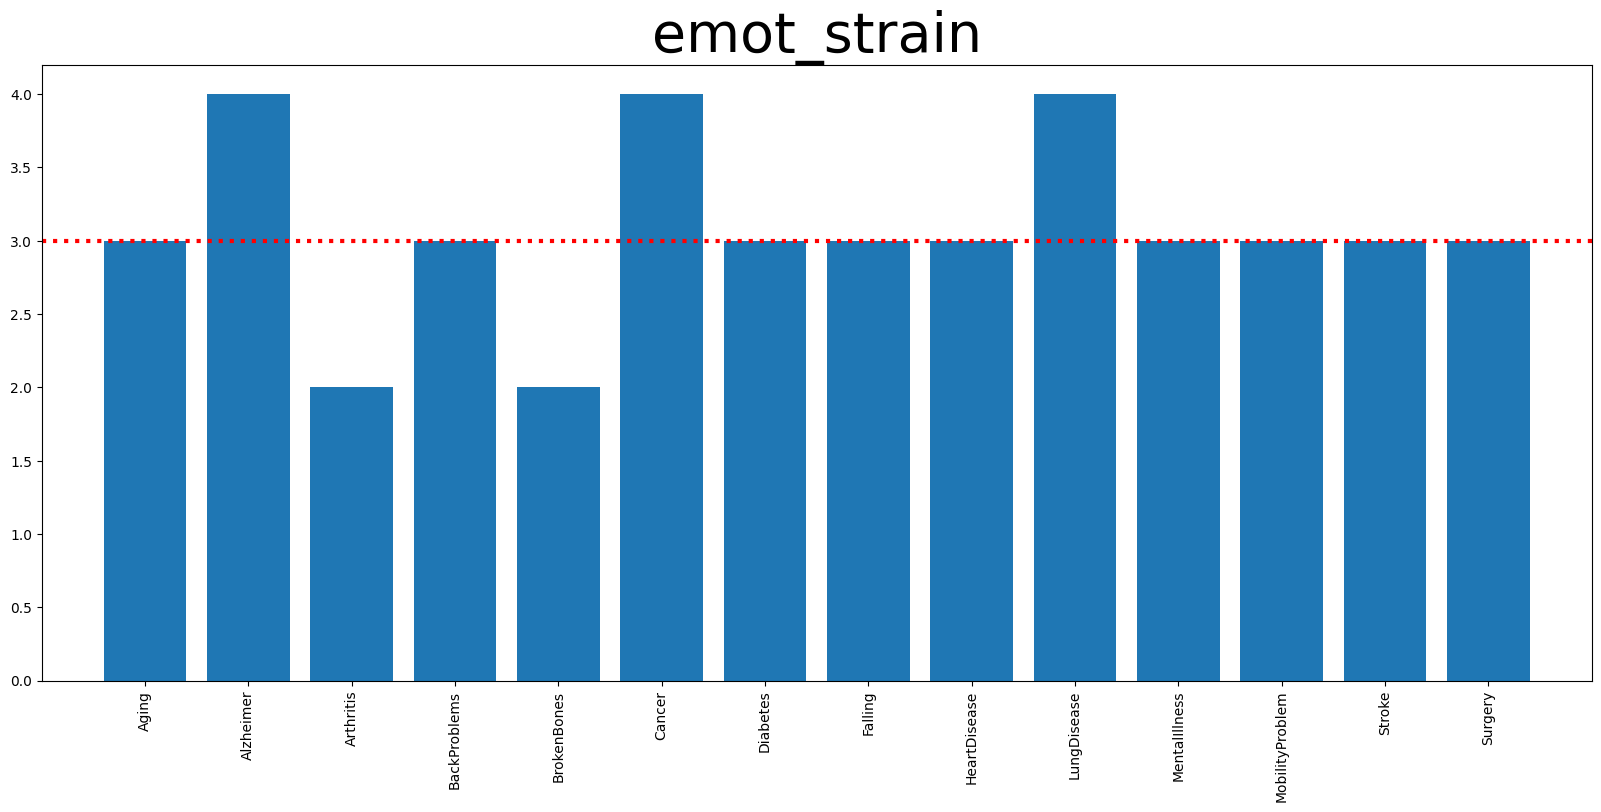

In [10]:
df_1 = data_q36.groupby(['illness'])['emot_strain'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['emot_strain'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['emot_strain'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "emot_strain", fontsize=40)
plt.plot()
plt.show()

In [11]:
data_q36.head()

illness  diff_aff_care  hours     choice  agecr relationship  \
0            Aging            3.0   28.0   Optional   87.0         13.0   
1  MobilityProblem            2.0    0.5  Mandatory   80.0          6.0   
2        Arthritis            1.0   77.0   Optional   71.0         26.0   
3           Cancer            1.0   12.0   Optional   89.0         13.0   
4         Diabetes            3.0   21.0   Optional   81.0         13.0   

   coord_care  iadls  agecg  hospitalized comm_care_prof  count_conditions  \
0         2.0    4.0     58           2.0             No               1.0   
1         7.0    6.0     37           3.0            Yes               1.0   
2         1.0    5.0     38           2.0            Yes               3.0   
3         2.0    6.0     64           3.0            Yes               1.0   
4         2.0    7.0     47           2.0            Yes               1.0   

   adls  income  emot_strain  
0   0.0     2.0          4.0  
1   4.0     6.0          3.0  
2   0.0     2.0          1.0  
3   0.0     6.0          2.0  
4   2.0     3.0          4.0

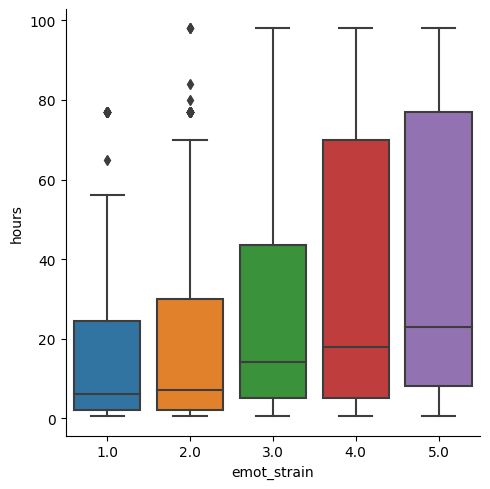

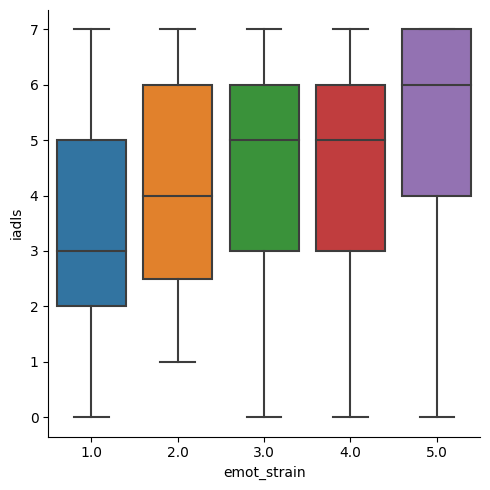

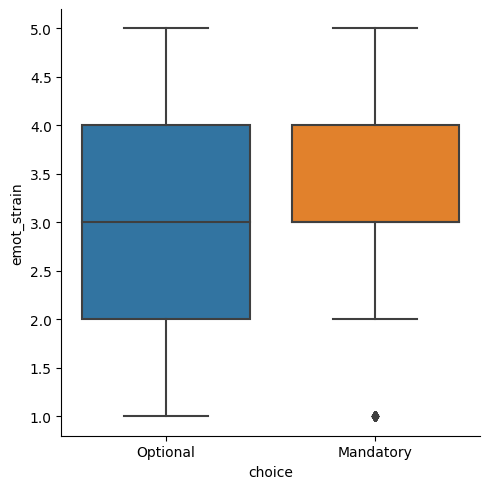

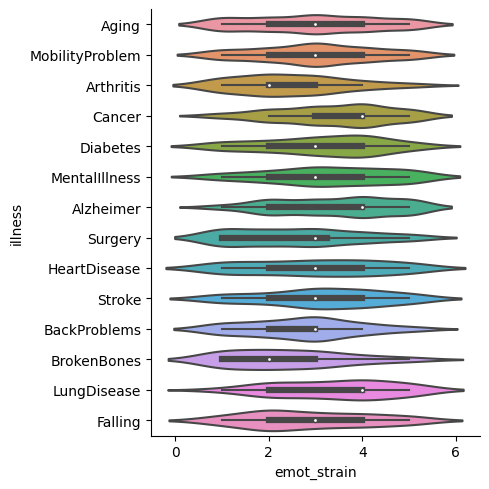

In [13]:
sns.catplot(x="emot_strain", y="hours", kind="box", data=data_q36)

sns.catplot(x="emot_strain", y="iadls", kind="box", data=data_q36)

sns.catplot(x="choice", y="emot_strain", kind="box", data=data_q36)

sns.catplot(x="comm_care_prof", y="emot_strain", kind="box", data=data_q36)

sns.catplot(x="count_conditions", y="emot_strain", kind="box", data=data_q36)

#sns.catplot(x="emot_strain", y="income", kind="box", data=data_q36)

sns.catplot(x="emot_strain", y="illness",
            kind="violin", data=data_q36)
